In [57]:
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import datasets

boston = datasets.load_boston()
df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
y = boston["target"]
X = df
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

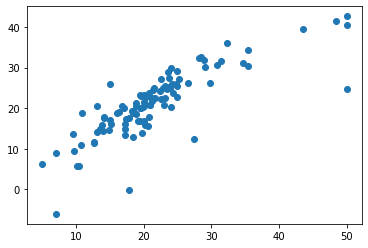

In [60]:
predict = modelo.predict(X_test)
plt.scatter(y_test,predict)
plt.show()

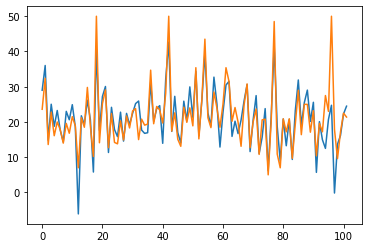

In [61]:
plt.plot(predict)
plt.plot(y_test)
plt.show()

In [62]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predict - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, predict))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, predict))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(y_test, predict)))
print("R2-score: %.2f" % r2_score(predict, y_test))

Soma dos Erros ao Quadrado (SSE): 2478 
Erro Quadrático Médio (MSE): 24.29
Erro Médio Absoluto (MAE): 3.19
Raiz do Erro Quadrático Médio (RMSE): 4.93 
R2-score: 0.63
